In [1]:
import re
import sys
sys.path.append("./")
import warnings
warnings.filterwarnings("ignore",category=FutureWarning)
import pandas as pd
import numpy as np
import xgboost as xgb
import lightgbm as lgbm
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV,cross_val_score
from sklearn.preprocessing import OneHotEncoder,LabelEncoder,scale
from sklearn.pipeline import Pipeline
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor 
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

from single_model import *


train = pd.read_csv("./train_with_ido.csv")
train = train.dropna(subset=["賃料"])
train = train.drop(20926)
train = train.drop(20231)
train = train.drop(20427)
train = train.drop(5775)
train_x = train.drop("賃料",axis=1)
train_y = train["賃料"]
test = pd.read_csv("./test_with_ido.csv")

/Users/kakeru/PycharmProjects/main_env/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
comment = """主要な駅への距離を追加"""
check_model(comment,train_x,train_y)

[00:42:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:43:43] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:45:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[00:46:39] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[21322.09892064 16955.5979349  19470.28390348 15090.50838712]
[00:48:12] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [3]:
commit(my_model(),train_x,train_y,test,"submit_11")

[00:50:01] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [2]:
m = pre_checker(train_x,train_y)
hoge = m.predict(train)

KeyboardInterrupt: 

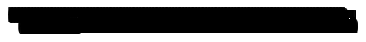

In [810]:
crazy_pred = crazy["賃料"].median()
print(crazy_pred)
pred = pd.DataFrame([crazy_pred for i in range(len(crazy.index))])
print(np.sqrt(mean_squared_error(crazy["賃料"],pred)))

650000.0
301848.99189789325


In [59]:
grid_params2={
    "xgb__n_estimators":[100,120,140],
    "xgb__max_depth":[7,8,9],
    "xgb__min_child_weight":[0,5,15],
    "xgb__learning_rate":[0.1,0.2],
    "xgb__random_state":[7777]
}
GCV2 = GridSearchCV(
    Pipeline(steps=rich_step),
    grid_params2,
    cv = 3,
    scoring="neg_mean_squared_error",
    verbose=3
)
GCV2.fit(temp_x_rich,temp_y_rich)

Fitting 3 folds for each of 54 candidates, totalling 162 fits
[CV] xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=0, xgb__n_estimators=100, xgb__random_state=7777 
[17:05:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=0, xgb__n_estimators=100, xgb__random_state=7777, score=-20533275032.002, total=   0.6s
[CV] xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=0, xgb__n_estimators=100, xgb__random_state=7777 
[17:05:14] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.6s remaining:    0.0s


[CV]  xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=0, xgb__n_estimators=100, xgb__random_state=7777, score=-15907774518.319, total=   0.6s
[CV] xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=0, xgb__n_estimators=100, xgb__random_state=7777 
[17:05:15] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.3s remaining:    0.0s


[CV]  xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=0, xgb__n_estimators=100, xgb__random_state=7777, score=-9381239329.321, total=   0.6s
[CV] xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=0, xgb__n_estimators=120, xgb__random_state=7777 
[17:05:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=0, xgb__n_estimators=120, xgb__random_state=7777, score=-20454789224.898, total=   0.7s
[CV] xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=0, xgb__n_estimators=120, xgb__random_state=7777 
[17:05:16] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[CV]  xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_child_weight=0, xgb__n_estimators=120, xgb__random_state=7777, score=-15826305572.156, total=   0.9s
[CV] xgb__learning_rate=0.1, xgb__max_depth=7, xgb__min_c

[Parallel(n_jobs=1)]: Done 162 out of 162 | elapsed:  2.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('drop_id',
                                        <my_class.drop_id object at 0x134b3b690>),
                                       ('parse_area',
                                        <my_class.parse_area_size object at 0x136792550>),
                                       ('parse_room',
                                        <my_class.parse_rooms object at 0x136792a50>),
                                       ('parse_old',
                                        <my_class.parse_how_old object at 0x136792990>),
                                       ('str_label',
                                        <my_class.structure_lab...
                                                     seed=None, silent=None,
                                                     subsample=1,
                                                     verbosity=1))],
         